# **Intro ML Week 2.2 - Case**
---
**Default Payment Prediction**

**Task Description:**
- The data is related to credit card clients data of a Taiwan banking institution.
- The goal is to predict whether a bank client will default in the next month payment.

**Data Definition:**

The [dataset](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset) contains information regarding default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

---

**Data Description:**

| **Feature**            | **Description**                                                              |
|-------------------------|------------------------------------------------------------------------------|
| `ID` (numeric)    | ID of each client.                             |
| `LIMIT_BAL` (numeric)       | Amount of given credit in Taiwan dollars (includes individual and family/supplementary credit).                         |
| `SEX` (categorical)        | Gender (1=male, 2=female).                     |
| `EDUCATION` (categorical) | Client's education degree (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown).                    |
| `MARRIAGE` (categorical)    | Marital status (1=married, 2=single, 3=others).                     |
| `AGE` (numeric)         | Age in years.              |
| `PAY_0` - `PAY_6` (categorical) | Payment status over the last $n$-month (-1=pay duly, 1=payment delay for 1 month, 2=payment delay for 2 months, ..., 9=payment delay for >= 9 months). |
| `BILL_AMT1` - `BILL_AMT6` (numeric)              | Remaining amount of bill over for each of the last 6 months.                                    |
| `PAY_AMT1` - `PAY_AMT6` (numeric)              | Paid amount in each bill over the last 6 months.                                    |

---

**Output Variable (to be predicted):**

| **Feature**            | **Description**                                                              |
|-------------------------|------------------------------------------------------------------------------|
| `default.payment.next.month` (binary)    | Whether the client do a default payment in the next month (1=yes, 0=no).                             |

# **Workflow**
---

In [ ]:
# Import the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## **Load Data**
---

- Define the function `load_data`.
- It receives one argument `filename`.
- In the function we need to:
    1. Load the data using `pandas` library.
    2. Drop any dupicate data using `pd.drop_duplicates()`


In [ ]:
# Function to load csv data.
def load_data(filename):
    """
    Read the csv dataset and return it as pandas dataframe.
    """
    # Load the data in dataframe format.
    df = pd.read_csv(filename, sep=';')
    print(f"Original data shape      : {df.shape} - (#data, #kolom)")

    # Drop any duplicate data.
    n_duplicates = df.duplicated().sum()
    print(f"The number of duplicates : {n_duplicates}")

    df = df.drop_duplicates()
    print(f"Dropped data shape       : {df.shape} - (#data, #kolom)")

    return df

In [ ]:
# Load the data.
FNAME = "2.2-credit_data.csv"
credit_df = load_data(filename = FNAME)

Original data shape      : (30000, 25) - (#data, #kolom)
The number of duplicates : 0
Dropped data shape       : (30000, 25) - (#data, #kolom)


In [ ]:
# Check the top 5 data.
credit_df.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0,NaN,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,NaN,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,NaN,1
2,2,NaN,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,3,50000.0,2.0,NaN,1.0,37.0,0.0,NaN,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,NaN,1069.0,1000.0,0
4,4,50000.0,NaN,NaN,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,NaN,10000.0,9000.0,689.0,679.0,0


## **Data Preprocessing**
---
1. Data Split
    - Input-Output (`X`-`y`) Split
    - Train-Test Split
    - Numerical-Categorical Split
2. Imputation
3. Encoding
4. Scaling

### **1 - Data Split**
---

#### **Input-Output (`X`-`y`) Split**

- `y` is the output variable to be predict.
- The rest are input variables.

- Define the function `input_output_split`.
- It receives 3 arguments
    1. `data`
    2. `output_col`
    3. `cols_to_drop`
- In the function we need to:
    1. Drop any unused variables.
    2. Get the input variables by removing the output variable.
    3. Get the output variable using selection.

In [ ]:
# Function to split input and output variable.
def input_output_split(data, output_col, cols_to_drop):
    """
    Split the input and output variables.
    """
    data = data.drop(columns = cols_to_drop)

    X = data.drop(output_col,
                  axis = 1)

    y = data[output_col]

    return X, y

In [ ]:
# Split the input and output variable.
cols_to_drop = ["Unnamed: 0"]
output_col = ["default.payment.next.month"]

X, y = input_output_split(data = credit_df,
                          output_col = output_col,
                          cols_to_drop = cols_to_drop)

In [ ]:
# Check the input data.
X.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,NaN,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,NaN,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,NaN


In [ ]:
# Check the output data.
y.head(2)

,default.payment.next.month
0,1
1,1


#### **Category Grouping**

Check the count value.

In [ ]:
for col in X.columns:
    print(f"{col} : {len(X[col].value_counts())}")

LIMIT_BAL : 81
SEX : 2
EDUCATION : 7
MARRIAGE : 4
AGE : 56
PAY_0 : 11
PAY_2 : 11
PAY_3 : 11
PAY_4 : 11
PAY_5 : 10
PAY_6 : 10
BILL_AMT1 : 21179
BILL_AMT2 : 20743
BILL_AMT3 : 20523
BILL_AMT4 : 20076
BILL_AMT5 : 19495
BILL_AMT6 : 19123
PAY_AMT1 : 7515
PAY_AMT2 : 7443
PAY_AMT3 : 7151
PAY_AMT4 : 6576
PAY_AMT5 : 6543
PAY_AMT6 : 6564


In [ ]:
# Check the repayment status.
repayment_columns = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

for col in repayment_columns:
    print(f"{X[col].value_counts(normalize=True)}\n")

PAY_0
 0.0    0.490045
-1.0    0.190549
 1.0    0.122330
-2.0    0.092337
 2.0    0.089363
 3.0    0.010590
 4.0    0.002611
 5.0    0.000834
 8.0    0.000653
 6.0    0.000363
 7.0    0.000326
Name: proportion, dtype: float64

PAY_2
 0.0    0.523188
-1.0    0.201820
 2.0    0.131477
-2.0    0.126473
 3.0    0.011059
 4.0    0.003191
 1.0    0.000979
 5.0    0.000761
 7.0    0.000616
 6.0    0.000399
 8.0    0.000036
Name: proportion, dtype: float64

PAY_3
 0.0    0.525787
-1.0    0.199682
-2.0    0.135278
 2.0    0.126387
 3.0    0.007662
 4.0    0.002530
 7.0    0.000867
 6.0    0.000831
 5.0    0.000723
 1.0    0.000145
 8.0    0.000108
Name: proportion, dtype: float64

PAY_4
 0.0    0.548248
-1.0    0.190492
-2.0    0.144472
 2.0    0.105120
 3.0    0.006051
 4.0    0.002247
 7.0    0.001848
 5.0    0.001196
 6.0    0.000181
 1.0    0.000072
 8.0    0.000072
Name: proportion, dtype: float64

PAY_5
 0.0    0.564964
-1.0    0.184945
-2.0    0.151993
 2.0    0.086848
 3.0    0.005715
 

- Based on above results, we see that some categories doesn't give enough information.
    - For `PAY_0`, we can group category $4$-$8$ into category $3$
    - For `PAY_2`, we can group category $4$-$8$ into category $3$, and category $1$ grouped into category $2$
    - For `PAY_3` and `PAY_4`, similar to `PAY_2`
    - For `PAY_5` and `PAY_6`, similar to `PAY_0`

In [ ]:
# Grouping the categories.
pay_list_to_3 = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
pay_list_to_2 = ["PAY_2", "PAY_3", "PAY_4"]

list_set_3 = [4.0, 5.0, 6.0, 7.0, 8.0]

# Convert to category 3.
for i in pay_list_to_3:
    for j in list_set_3:
        X.loc[X[i] == j, i] = 3.0

# Convert to category 2.
for i in pay_list_to_2:
    X.loc[X[i] == 1.0] = 2.0

In [ ]:
# Check the repayment status after grouping.
for col in repayment_columns:
    print(f"{X[col].value_counts(normalize=True)}\n")

PAY_0
 0.0    0.489956
-1.0    0.190514
 1.0    0.121474
-2.0    0.092320
 2.0    0.090362
 3.0    0.015375
Name: proportion, dtype: float64

PAY_2
 0.0    0.523169
-1.0    0.201813
 2.0    0.132487
-2.0    0.126468
 3.0    0.016062
Name: proportion, dtype: float64

PAY_3
 0.0    0.525694
-1.0    0.199371
-2.0    0.134902
 2.0    0.127313
 3.0    0.012720
Name: proportion, dtype: float64

PAY_4
 0.0    0.547974
-1.0    0.190376
-2.0    0.144068
 2.0    0.105986
 3.0    0.011595
Name: proportion, dtype: float64

PAY_5
 0.0    0.564618
-1.0    0.184758
-2.0    0.151662
 2.0    0.087713
 3.0    0.011249
Name: proportion, dtype: float64

PAY_6
 0.0    0.542549
-1.0    0.190695
-2.0    0.163003
 2.0    0.093594
 3.0    0.010158
Name: proportion, dtype: float64



In [ ]:
# Check the EDUCATION column.
# EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown).

X["EDUCATION"].value_counts(normalize=True)

,proportion
EDUCATION,
2.0,0.467042
1.0,0.354422
3.0,0.162993
5.0,0.009261
4.0,0.004104
6.0,0.001707
0.0,0.000472


- Based on above results, we see that some categories doesn't give enough information. Also, there exists category $0.0$ that is invalid.
- Thus, we will group category $0.0$, $4.0$, $5.0$, and $6.0$ into category `others` ($4.0$)

In [ ]:
# Grouping the categories.
edu_list_to_4 = [0.0, 5.0, 6.0]

for i in edu_list_to_4:
    X.loc[X["EDUCATION"] == i, "EDUCATION"] = 4.0

In [ ]:
# Check the education after grouping.
X["EDUCATION"].value_counts(normalize=True)

,proportion
EDUCATION,
2.0,0.467042
1.0,0.354422
3.0,0.162993
4.0,0.015544


In [ ]:
# Check the MARRIAGE column.
# MARRIAGE (1=married, 2=single, 3=others).

X["MARRIAGE"].value_counts(normalize=True)

,proportion
MARRIAGE,
2.0,0.532408
1.0,0.455157
3.0,0.010592
0.0,0.001844


- We will group category $0.0$ to category `others` ($3.0$).

In [ ]:
# Grouping the categories.
X.loc[X["MARRIAGE"] == 0.0, "MARRIAGE"] = 3.0

In [ ]:
# Check the marriage after grouping.
X["MARRIAGE"].value_counts(normalize=True)

,proportion
MARRIAGE,
2.0,0.532408
1.0,0.455157
3.0,0.012435


In [ ]:
# Check the SEX column.
# SEX (1=male, 2=female).

X["SEX"].value_counts(normalize=True)

,proportion
SEX,
2.0,0.604856
1.0,0.395144


- Looks good, there are no invalid data.

#### **Train-Test Split**

- Train data : to train the model.
- Test data  : simulate the future unseen data.

- We can use `scikit-learn` function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- It receives several arguments:
    - `X` : the input variables.
    - `y` : the output variable (class).
    - `test_size` : the proportion of test data; e.g. `test_size = 0.2` means 20% of data will be used as the test data.
    - `random_state` : used for reproducibility. We can use any number, but we will use `random_state = 123` for now.

- The `train_test_split` function results 4 outputs:
    1. `X_train` : the train input.
    2. `X_test` : the test input.
    3. `y_train` : the train output.
    4. `y_test` : the test output.
- **Note:** must be in the same order as above.

> Read more: [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
# Import the train_test_split function.
from sklearn.model_selection import train_test_split

In [ ]:
# Split the train and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 123)

# Print the shape of the data.
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape  : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape  : {y_test.shape}")

X_train shape : (24000, 23)
X_test shape  : (6000, 23)
y_train shape : (24000, 1)
y_test shape  : (6000, 1)


In [ ]:
# Check the data test proportion.
X_test.shape[0] / X.shape[0]

0.2

**Important Note:**

- In the preprocessing and modeling phase, we **only** focus to the train data.
- Test data will be used after we get the best model (we will talk more about it in later sessions).

#### **Numerical-Categorical Split**

- Handling numerical data are differs to categorical data; So we need to split them.

In [ ]:
# Check the type of each variable.
X_train.dtypes

,0
LIMIT_BAL,float64
SEX,float64
EDUCATION,float64
MARRIAGE,float64
AGE,float64
PAY_0,float64
PAY_2,float64
PAY_3,float64
PAY_4,float64
PAY_5,float64


- There are some categorical columns detected as numerical column.
- We will define the numerical & categorical columns manually.

- Numerical variables: `LIMIT_BAL`, `AGE`, `BILL_AMT1`, `BILL_AMT2`, `BILL_AMT3`, `BILL_AMT4`, `BILL_AMT5`, `BILL_AMT6`, `PAY_AMT1`, `PAY_AMT2`, `PAY_AMT3`, `PAY_AMT4`, `PAY_AMT5`, `PAY_AMT6`.
- Categorical variables: `SEX`, `EDUCATION`, `MARRIAGE`, `PAY_0`, `PAY_2`, `PAY_3`, `PAY_4`, `PAY_5`, `PAY_6`

In [ ]:
# Get the numerical variables.
num_cols = ["LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

# Get the categorical variables.
cat_cols = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

print(f"Numerical Variables:\n{num_cols}\n")
print(f"Categorical Variables:\n{cat_cols}")

Numerical Variables:
['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

Categorical Variables:
['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [ ]:
# Define the train numerical and categorical data.
X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]

In [ ]:
# Check the train numerical data.
X_train_num.head(2)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
19682,200000.0,46.0,106651.0,103173.0,104137.0,103422.0,95206.0,65108.0,3692.0,5000.0,3300.0,2500.0,2930.0,1500.0
11062,120000.0,32.0,3556.0,NaN,NaN,476.0,802.0,326.0,652.0,326.0,476.0,802.0,0.0,326.0


In [ ]:
# Check the train categorical data.
X_train_cat.head(2)

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
19682,2.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
11062,2.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0


Nice! Next we move to handling missing values (`NaN`) data.

### **2 - Imputation**
---

#### **Numerical Imputation**

- For numerical variables, we can impute using mean or median.
- Mean are sensitive to outliers, the better way we use median that robust to outliers.

In [ ]:
# Check whether exists missing values.
X_train_num.isnull().sum()

,0
LIMIT_BAL,1941
AGE,1920
BILL_AMT1,1865
BILL_AMT2,1964
BILL_AMT3,1884
BILL_AMT4,1883
BILL_AMT5,1994
BILL_AMT6,1982
PAY_AMT1,2010
PAY_AMT2,2017


We can use `SimpleImputer` class from `scikit-learn` to make an imputer.

> Read more: [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [ ]:
# Import the SimpleImputer class.
from sklearn.impute import SimpleImputer

- Let's define on a function called `num_imputation`.
- It receives 2 arguments:
    1. `data`
    2. `num_cols`

In [ ]:
# Function to impute numerical data.
def num_imputation(data, num_cols):
    """
    Fill the numerical missing values using median.
    """
    # Create the imputer object.
    num_imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "median")

    # Fit the numerical imputer.
    num_imputer.fit(data)

    # Transform the data.
    imputed_data = num_imputer.transform(data)
    X_train_num_imputed = pd.DataFrame(imputed_data,
                                       columns = num_cols,
                                       index = data.index)

    # Return the imputer object and the imputed data.
    return num_imputer, X_train_num_imputed

**Important Note:**

There are common built-in functions in `scikit-learn`:

1. `fit()`
2. `transform()`
3. `predict()` for ML models

In general we will use these 3 functions for preprocessing and modeling phase.

- `SimpleImputer` class also has its `fit` and `transform` function.
    - `fit` : calculate the mean or median of each column.
    - `transform` : fill the missing values using the mean or median.

**Another Important Note:**

- Use the `fit` functions **ONLY** on train data.
- The `fit` in scikit-learn terms means *training*.
- Don't use `fit` functions on test data, since it means *training on the future unseen data*.

In [ ]:
# Impute the numerical data.
num_imputer, X_train_num_imputed = num_imputation(data = X_train_num,
                                                  num_cols = num_cols)

In [ ]:
# Check the results.
X_train_num_imputed.isnull().sum()

,0
LIMIT_BAL,0
AGE,0
BILL_AMT1,0
BILL_AMT2,0
BILL_AMT3,0
BILL_AMT4,0
BILL_AMT5,0
BILL_AMT6,0
PAY_AMT1,0
PAY_AMT2,0


#### **Categorical Imputation**

- We can do the similar process to impute categorical variables.
- But, we will use another method without utilizing `SimpleImputer` class.
- We can utilize `pd.fillna` function to do the imputation.

> Read more: [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

In [ ]:
# Check whether exists missing values.
X_train_cat.isnull().sum()

,0
SEX,1862
EDUCATION,1945
MARRIAGE,1835
PAY_0,1973
PAY_2,1953
PAY_3,1878
PAY_4,1930
PAY_5,1909
PAY_6,1889


- For categorical variables, we can impute using constant or mode (most frequent value).
- We will impute using a constant `"UNKNOWN"`.

- Define a function called `cat_imputation`.
- It receives 2 arguments `data` and `cat_cols`

In [ ]:
# Function to impute categorical data.
def cat_imputation(data, cat_cols):
    """
    Fill the categorical missing values using a constant "KOSONG".
    """
    X_train_cat_imputed = data.fillna(value="UNKNOWN")

    return X_train_cat_imputed

In [ ]:
# Perform the categorical imputation.
X_train_cat_imputed = cat_imputation(data = X_train_cat,
                                     cat_cols = cat_cols)

In [ ]:
# Check the results.
X_train_cat_imputed.isnull().sum()

,0
SEX,0
EDUCATION,0
MARRIAGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0
PAY_6,0


In [ ]:
X_train_cat_imputed.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
19682,2.0,2.0,UNKNOWN,0.0,0.0,0.0,0.0,0.0,0.0
11062,2.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0
197,2.0,UNKNOWN,2.0,0.0,0.0,0.0,0.0,UNKNOWN,0.0
23620,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,-1.0
26031,2.0,2.0,2.0,0.0,0.0,0.0,0.0,UNKNOWN,0.0


### **3 - Encoding**
---

ML models only receives numerical values; So we need to transform the categorical values we have.

- One of the most common method is using One Hot Encoding (OHE).
- We can utilize the `pd.get_dummies` function.

> Read more: [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

- Define the `ohe_encode` function.
- It receives 2 arguments `data` and `cat_cols`.

In [ ]:
# Function to encode categorical values.
def ohe_encode(data, cat_cols):
    """
    Transform the categorical values to numerical values.
    """
    X_train_cat_encoded = pd.get_dummies(data,
                                         dtype = int)

    return X_train_cat_encoded

In [ ]:
# Encode the categorical variables.
X_train_cat_encoded = ohe_encode(data = X_train_cat_imputed,
                                 cat_cols = cat_cols)

In [ ]:
# Check the data before encoding.
X_train_cat_imputed.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
19682,2.0,2.0,UNKNOWN,0.0,0.0,0.0,0.0,0.0,0.0
11062,2.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0
197,2.0,UNKNOWN,2.0,0.0,0.0,0.0,0.0,UNKNOWN,0.0
23620,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,-1.0
26031,2.0,2.0,2.0,0.0,0.0,0.0,0.0,UNKNOWN,0.0


In [ ]:
# Check the data after encoding.
X_train_cat_encoded.head()

,SEX_1.0,SEX_2.0,SEX_UNKNOWN,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,EDUCATION_UNKNOWN,MARRIAGE_1.0,MARRIAGE_2.0,...,PAY_5_0.0,PAY_5_2.0,PAY_5_3.0,PAY_5_UNKNOWN,PAY_6_-2.0,PAY_6_-1.0,PAY_6_0.0,PAY_6_2.0,PAY_6_3.0,PAY_6_UNKNOWN
19682,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
11062,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
197,0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
23620,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
26031,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
# Store the OHE columns for transforming test data later.
ohe_columns = X_train_cat_encoded.columns
ohe_columns

Index(['SEX_1.0', 'SEX_2.0', 'SEX_UNKNOWN', 'EDUCATION_1.0', 'EDUCATION_2.0',
       'EDUCATION_3.0', 'EDUCATION_4.0', 'EDUCATION_UNKNOWN', 'MARRIAGE_1.0',
       'MARRIAGE_2.0', 'MARRIAGE_3.0', 'MARRIAGE_UNKNOWN', 'PAY_0_-2.0',
       'PAY_0_-1.0', 'PAY_0_0.0', 'PAY_0_1.0', 'PAY_0_2.0', 'PAY_0_3.0',
       'PAY_0_UNKNOWN', 'PAY_2_-2.0', 'PAY_2_-1.0', 'PAY_2_0.0', 'PAY_2_2.0',
       'PAY_2_3.0', 'PAY_2_UNKNOWN', 'PAY_3_-2.0', 'PAY_3_-1.0', 'PAY_3_0.0',
       'PAY_3_2.0', 'PAY_3_3.0', 'PAY_3_UNKNOWN', 'PAY_4_-2.0', 'PAY_4_-1.0',
       'PAY_4_0.0', 'PAY_4_2.0', 'PAY_4_3.0', 'PAY_4_UNKNOWN', 'PAY_5_-2.0',
       'PAY_5_-1.0', 'PAY_5_0.0', 'PAY_5_2.0', 'PAY_5_3.0', 'PAY_5_UNKNOWN',
       'PAY_6_-2.0', 'PAY_6_-1.0', 'PAY_6_0.0', 'PAY_6_2.0', 'PAY_6_3.0',
       'PAY_6_UNKNOWN'],
      dtype='object')

### **4 - Join the Numerical & Categorical Data**
---

- Let's concat the processed numerical and categorical data into one dataframe.
- We can utilize the `pd.concat` function.

In [ ]:
X_train_concat = pd.concat([X_train_num_imputed, X_train_cat_encoded],
                           axis = 1)

X_train_concat.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_0.0,PAY_5_2.0,PAY_5_3.0,PAY_5_UNKNOWN,PAY_6_-2.0,PAY_6_-1.0,PAY_6_0.0,PAY_6_2.0,PAY_6_3.0,PAY_6_UNKNOWN
19682,200000.0,46.0,106651.0,103173.0,104137.0,103422.0,95206.0,65108.0,3692.0,5000.0,...,1,0,0,0,0,0,1,0,0,0
11062,120000.0,32.0,3556.0,20785.5,20081.0,476.0,802.0,326.0,652.0,326.0,...,0,0,0,0,0,0,0,1,0,0
197,20000.0,22.0,18553.0,19446.0,19065.0,8332.0,18868.0,19247.0,1500.0,1032.0,...,0,0,0,1,0,0,1,0,0,0
23620,100000.0,34.0,91674.0,91348.0,87244.0,23181.0,7721.0,16745.5,5004.0,3811.0,...,1,0,0,0,0,1,0,0,0,0
26031,290000.0,29.0,7324.0,8174.0,8389.0,8770.0,9145.0,10016.0,1130.0,1502.0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
# Check the missing values.
X_train_concat.isnull().sum()

,0
LIMIT_BAL,0
AGE,0
BILL_AMT1,0
BILL_AMT2,0
BILL_AMT3,0
...,...
PAY_6_-1.0,0
PAY_6_0.0,0
PAY_6_2.0,0
PAY_6_3.0,0


### **5 - Standardization (Scaling)**
---

- Some variables might have different scale, e.g. `age` and `balance`.
- It might be a problem for some models (we will talk about it later).

We can utilize the `StandardScaler`class from scikit-learn.

> Read more: [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

- Define the `scale_data` function.
- It receives 1 argument `data`.
- In the function we need to:
    1. Create the `StandardScaler` object.
    2. Fit the standardizer on `X_train_concat`.
    3. Transform the data.

In [ ]:
# Import the StandardScaler class.
from sklearn.preprocessing import StandardScaler

In [ ]:
# Function to scale the data.
def scale_data(data):
    """
    Scale the data using StandardScaler.
    """
    # Create the StandardScaler object.
    scaler = StandardScaler()

    # Fit the standardizer on X_train_concat.
    scaler.fit(data)

    # Transform the data.
    scaled_data = scaler.transform(data)
    X_train_scaled = pd.DataFrame(scaled_data,
                                  columns = data.columns,
                                  index = data.index)

    return scaler, X_train_scaled

In [ ]:
# Scale the data.
scaler, X_train_clean = scale_data(data = X_train_concat)

In [ ]:
# Check the results.
X_train_clean.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_0.0,PAY_5_2.0,PAY_5_3.0,PAY_5_UNKNOWN,PAY_6_-2.0,PAY_6_-1.0,PAY_6_0.0,PAY_6_2.0,PAY_6_3.0,PAY_6_UNKNOWN
19682,0.278465,1.197082,0.818863,0.821879,0.891175,1.000553,0.973125,0.493104,-0.103260,-0.027810,...,0.961732,-0.29455,-0.105058,-0.293965,-0.420633,-0.464217,1.002253,-0.304789,-0.099441,-0.292289
11062,-0.362450,-0.374450,-0.640835,-0.377091,-0.373128,-0.659378,-0.640967,-0.636933,-0.295720,-0.254049,...,-1.039791,-0.29455,-0.105058,-0.293965,-0.420633,-0.464217,-0.997753,3.280961,-0.099441,-0.292289
197,-1.163593,-1.496973,-0.428496,-0.396584,-0.388410,-0.532705,-0.332080,-0.306881,-0.242034,-0.219876,...,-1.039791,-0.29455,-0.105058,3.401768,-0.420633,-0.464217,1.002253,-0.304789,-0.099441,-0.292289
23620,-0.522678,-0.149946,0.606807,0.649792,0.637084,-0.293276,-0.522668,-0.350516,-0.020198,-0.085362,...,0.961732,-0.29455,-0.105058,-0.293965,-0.420633,2.154164,-0.997753,-0.304789,-0.099441,-0.292289
26031,0.999493,-0.711207,-0.587485,-0.560623,-0.548989,-0.525643,-0.498321,-0.467904,-0.265458,-0.197126,...,-1.039791,-0.29455,-0.105058,3.401768,-0.420633,-0.464217,1.002253,-0.304789,-0.099441,-0.292289


Excellent! Now we are ready to modeling phase.

## **Modeling**
---
1. Baseline Model
2. Training Model
3. Testing Model

### **Baseline Model**
---
- The *benchmark* model.
- The trained model performance must exceed the baseline performance.

In [ ]:
# Baseline classification: majority vote.
y_train.value_counts(normalize = True)

,proportion
default.payment.next.month,
0,0.777833
1,0.222167


Our model must exceeds 78% accuracy.

### **Training Model**
---

- Let's say we use 3 models:
    1. K-Nearest Neighbors
        - Calculate the **distance** from data to be predicted to all available data.
    > Read more: [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

    2. Logistic Regression
    3. Random Forest

In [ ]:
# Import the required models.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create model object.
knn = KNeighborsClassifier()

# Train the model.
knn.fit(X_train_clean, y_train)

KNeighborsClassifier()

In [ ]:
# Create object model.
logreg = LogisticRegression(random_state = 123)

# Train the model.
logreg.fit(X_train_clean, y_train)

LogisticRegression(random_state=123)

In [ ]:
# Create object model.
rf = RandomForestClassifier(random_state = 123)

# Train the model.
rf.fit(X_train_clean, y_train)

RandomForestClassifier(random_state=123)

Let's use these trained models on prediction.

In [ ]:
knn_pred = knn.predict(X_train_clean)
logreg_pred = logreg.predict(X_train_clean)
rf_pred = rf.predict(X_train_clean)

In [ ]:
knn_pred[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
logreg_pred[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
rf_pred[:30]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0])

### **Model Evaluation**
---
- We can evaluate classifiers using accuracy (the proportion of true prediction to all prediction)
- We will talk more about it in later session.

In [ ]:
# Benchmark accuracy.
benchmark = y_train.value_counts(normalize=True).values[0]
print(f"Benchmark Accuracy : {benchmark}")

Benchmark Accuracy : 0.7778333333333334


In [ ]:
# Performance on train data.
knn_train_acc = knn.score(X_train_clean, y_train)
logreg_train_acc = logreg.score(X_train_clean, y_train)
rf_train_acc = rf.score(X_train_clean, y_train)

print(f"KNN Accuracy : {knn_train_acc}")
print(f"LogReg Accuracy : {logreg_train_acc}")
print(f"RF Accuracy : {rf_train_acc}")

KNN Accuracy : 0.8402083333333333
LogReg Accuracy : 0.8174583333333333
RF Accuracy : 0.9998333333333334


### **Tuning $k$ in KNN**
---
- Try to tune the value of `n_neighbors` in `KNeighborsClassifier` and fine the best $k$ (highest accuracy).

In [ ]:
# Tune the n_neighbors in KNeighborsClassifier.
list_knn_acc_uniform = []
list_k = list(range(2, 21))

for k in list_k:
    # Distance weighted KNN
    knn_distance = KNeighborsClassifier(n_neighbors = k,
                                        weights = "distance")
    knn_distance.fit(X_train_clean, y_train)
    knn_train_acc_distance = knn_distance.score(X_train_clean, y_train)

    # Uniform weighted KNN
    knn_uniform = KNeighborsClassifier(n_neighbors = k,
                                       weights = "uniform")
    knn_uniform.fit(X_train_clean, y_train)
    knn_train_acc_uniform = knn_uniform.score(X_train_clean, y_train)
    list_knn_acc_uniform.append(knn_train_acc_uniform)

    print(f"k = {k} - Distance Acc = {knn_train_acc_distance:.4f} - Uniform Acc = {knn_train_acc_uniform:.4f}")

k = 1 - Distance Acc = 0.9993 - Uniform Acc = 0.9993
k = 2 - Distance Acc = 0.9998 - Uniform Acc = 0.8635
k = 3 - Distance Acc = 0.9998 - Uniform Acc = 0.8642
k = 4 - Distance Acc = 0.9998 - Uniform Acc = 0.8388
k = 5 - Distance Acc = 0.9998 - Uniform Acc = 0.8402
k = 6 - Distance Acc = 0.9998 - Uniform Acc = 0.8313
k = 7 - Distance Acc = 0.9998 - Uniform Acc = 0.8325
k = 8 - Distance Acc = 0.9998 - Uniform Acc = 0.8273
k = 9 - Distance Acc = 0.9998 - Uniform Acc = 0.8288
k = 10 - Distance Acc = 0.9998 - Uniform Acc = 0.8249
k = 11 - Distance Acc = 0.9998 - Uniform Acc = 0.8265
k = 12 - Distance Acc = 0.9998 - Uniform Acc = 0.8243
k = 13 - Distance Acc = 0.9998 - Uniform Acc = 0.8253
k = 14 - Distance Acc = 0.9998 - Uniform Acc = 0.8230
k = 15 - Distance Acc = 0.9998 - Uniform Acc = 0.8227
k = 16 - Distance Acc = 0.9998 - Uniform Acc = 0.8217
k = 17 - Distance Acc = 0.9998 - Uniform Acc = 0.8227
k = 18 - Distance Acc = 0.9998 - Uniform Acc = 0.8215
k = 19 - Distance Acc = 0.9998 - Unif

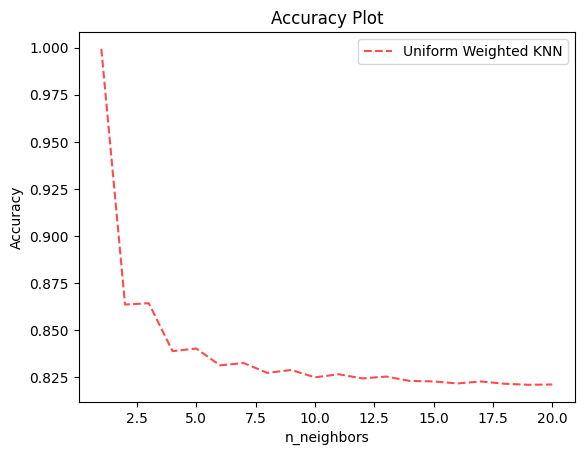


Highest Acc when k = 1


In [ ]:
# Plot the accuracy vs n_neighbors for both distance and uniform weighting.
plt.plot(list_k, list_knn_acc_uniform, label='Uniform Weighted KNN', color='red', linestyle='--', alpha=0.7)

plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.title("Accuracy Plot")
plt.legend()
plt.show()

print(f"\nHighest Acc when k = {np.argmax(list_knn_acc_uniform) + 1}")

- Based on the results above, we got the best $k = 3$.
- Distance-weighted KNN seems to be overfit.

In [ ]:
# Create the best KNN model.
best_knn = KNeighborsClassifier(n_neighbors=3)

# Train the model.
best_knn.fit(X_train_clean, y_train)

# Performance on train data.
best_knn_train_acc = best_knn.score(X_train_clean, y_train)

print(f"Best KNN Train Accuracy : {best_knn_train_acc}")

Best KNN Train Accuracy : 0.86425


### **Prepare the Test Prediction**
---

- Define a function called `test_preprocess`.
- It receives several arguments:
    1. `data`
    2. `num_cols`
    3. `cat_cols`
    4. `num_imputer`
    5. `scaler`

In [ ]:
# Preprocess test data.
def test_preprocess(data, num_cols, cat_cols, num_imputer, scaler):
    """
    Preprocess the test data.
    """
    # Filter the data.
    X_test_num = data[num_cols]
    X_test_cat = data[cat_cols]

    # Numerical imputation.
    num_imputed = num_imputer.transform(X_test_num)
    X_test_num_imputed = pd.DataFrame(num_imputed,
                                      columns = num_cols,
                                      index = X_test_num.index)

    # Categorical imputation.
    cat_imputed = X_test_cat.fillna(value="UNKNOWN")
    X_test_cat_imputed = pd.DataFrame(cat_imputed,
                                      columns = cat_cols,
                                      index = X_test_cat.index)

    # Categorical encoding.
    cat_encoded = pd.get_dummies(X_test_cat_imputed,
                                 dtype = int)
    ohe_cols = cat_encoded.columns
    X_test_cat_encoded = pd.DataFrame(cat_encoded,
                                      columns = ohe_cols,
                                      index = cat_encoded.index)

    # Concat the data.
    concat_data = pd.concat([X_test_num_imputed, X_test_cat_encoded],
                             axis = 1)

    # Scale the data.
    scaled_data = scaler.transform(concat_data)
    X_test_clean = pd.DataFrame(scaled_data,
                                columns = concat_data.columns,
                                index = concat_data.index)

    return X_test_clean

In [ ]:
X_test_clean = test_preprocess(data = X_test,
                               num_cols = num_cols,
                               cat_cols = cat_cols,
                               num_imputer = num_imputer,
                               scaler = scaler)

X_test_clean.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_0.0,PAY_5_2.0,PAY_5_3.0,PAY_5_UNKNOWN,PAY_6_-2.0,PAY_6_-1.0,PAY_6_0.0,PAY_6_2.0,PAY_6_3.0,PAY_6_UNKNOWN
25665,-1.003364,-1.047964,-0.280707,-0.324621,-0.373128,-0.667053,0.098030,-0.316475,-0.204048,-0.221425,...,-1.039791,-0.29455,-0.105058,-0.293965,-0.420633,-0.464217,1.002253,-0.304789,-0.099441,-0.292289
16464,-0.682907,-0.149946,0.380097,0.340181,0.124555,0.153270,-0.346904,0.220320,-0.133648,-0.172537,...,0.961732,-0.29455,-0.105058,-0.293965,-0.420633,-0.464217,1.002253,-0.304789,-0.099441,-0.292289
22386,0.038122,-0.598955,1.516310,1.631685,1.753788,1.873764,2.219343,2.338891,0.093505,-0.172537,...,-1.039791,3.39501,-0.105058,-0.293965,-0.420633,-0.464217,-0.997753,3.280961,-0.099441,-0.292289
10149,0.278465,0.635820,-0.357461,-0.668882,-0.675170,-0.667053,-0.654680,-0.642620,-0.290022,-0.269828,...,-1.039791,-0.29455,-0.105058,-0.293965,2.377369,-0.464217,-0.997753,-0.304789,-0.099441,-0.292289
8729,-0.923250,0.860325,-0.574884,-0.562661,-0.539137,-0.518306,-0.493671,-0.350516,-0.264825,-0.214164,...,0.961732,-0.29455,-0.105058,-0.293965,-0.420633,-0.464217,1.002253,-0.304789,-0.099441,-0.292289


In [ ]:
# Do prediction on test data.
knn_pred = knn.predict(X_test_clean)
logreg_pred = logreg.predict(X_test_clean)
rf_pred = rf.predict(X_test_clean)
best_knn_pred = best_knn.predict(X_test_clean)

In [ ]:
# Performance on test data.
knn_test_acc = knn.score(X_test_clean, y_test)
logreg_test_acc = logreg.score(X_test_clean, y_test)
rf_test_acc = rf.score(X_test_clean, y_test)
best_knn_test_acc = best_knn.score(X_test_clean, y_test)

print(f"KNN Test Accuracy : {knn_test_acc}")
print(f"LogReg Test Accuracy : {logreg_test_acc}")
print(f"RF Test Accuracy : {rf_test_acc}")
print(f"Best KNN Test Accuracy : {best_knn_test_acc}")

KNN Test Accuracy : 0.8111666666666667
LogReg Test Accuracy : 0.8178333333333333
RF Test Accuracy : 0.819
Best KNN Test Accuracy : 0.7775


### **Performance Summary**
---

In [ ]:
# Create a summary dataframe of train vs test performance.
performance = {
    "Model": ["Baseline", "KNN", "LogReg", "RF", "Best KNN"],
    "Train Accuracy": [benchmark, knn_train_acc, logreg_train_acc, rf_train_acc, best_knn_train_acc],
    "Test Accuracy": [None, knn_test_acc, logreg_test_acc, rf_test_acc, best_knn_test_acc]
}

summary_df = pd.DataFrame(performance)
summary_df

,Model,Train Accuracy,Test Accuracy
0,Baseline,0.777833,NaN
1,KNN,0.999833,0.811167
2,LogReg,0.817458,0.817833
3,RF,0.999833,0.819000
4,Best KNN,0.864250,0.777500


**Summary:**
- All performances exceeds the benchmark.


<details>
  <summary>Which model is the best?</summary>
  <ol>KNN and LogReg indicates a good fit model.</ol>
  <ol>RF indicates an overfit model.</ol>
  <ol>Seems like LogReg is the best model.</ol>
</details>